<a href="https://colab.research.google.com/github/MiteshBhanushali/TelecomChurnAnalysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading dataset
path='/content/drive/My Drive/Copy of Telecom Churn.csv'
telecom_data=pd.read_csv(path)

Exploring Data

In [ ]:
#View and overview of data
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
telecom_data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
telecom_data.shape

(3333, 20)

In [ ]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
telecom_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
colname_list=telecom_data.columns[(telecom_data.dtypes=='object')].tolist()
colname_list_num=telecom_data.columns[(telecom_data.dtypes!='object')].tolist()
colname_list_num.remove('Churn')
print(colname_list)
print(colname_list_num)

['State', 'International plan', 'Voice mail plan']
['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


Checking Missing Values In data and outliers 

In [ ]:
telecom_data.isnull().sum() #No missing value in data set

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

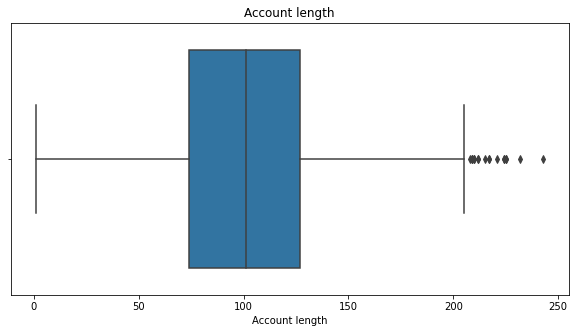

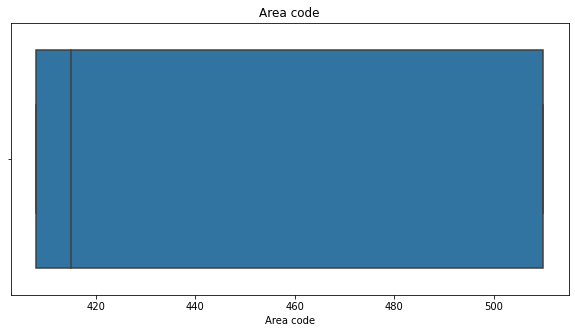

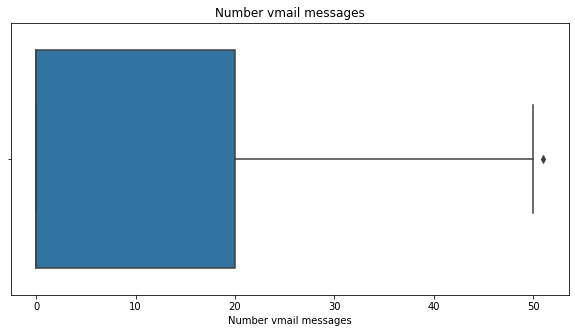

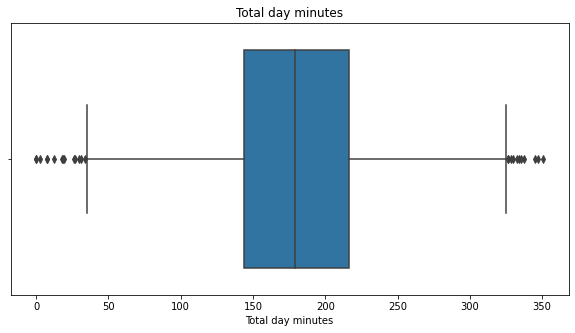

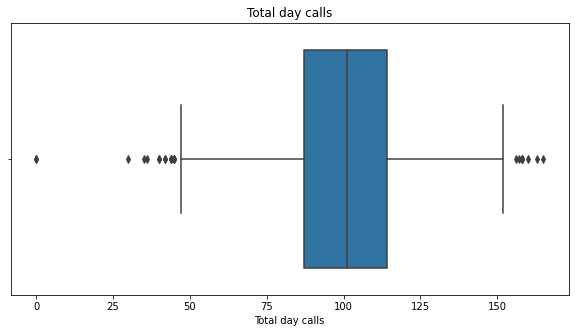

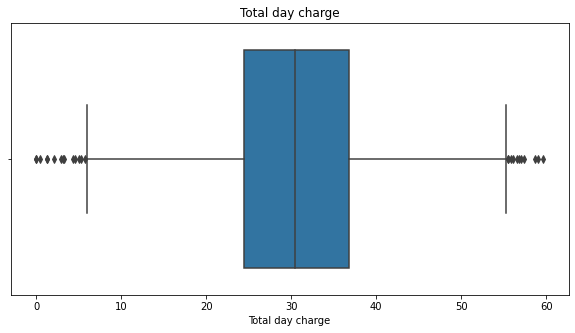

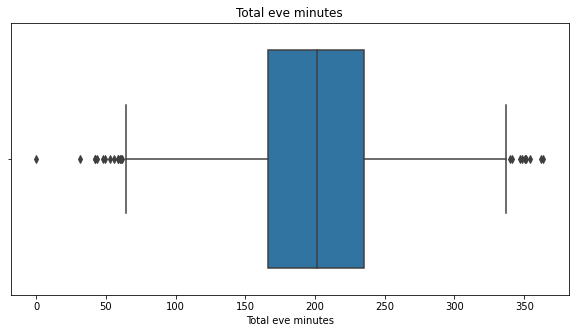

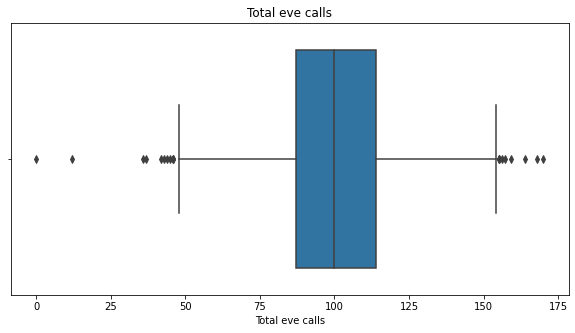

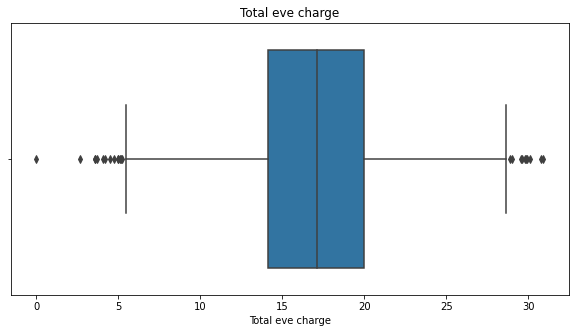

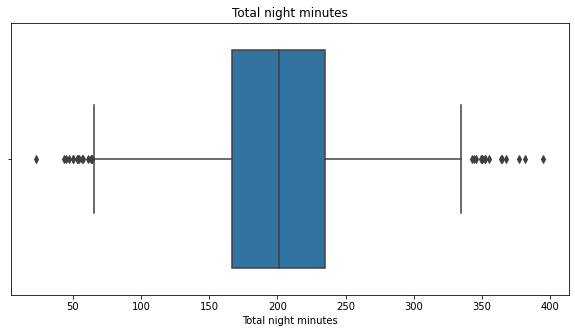

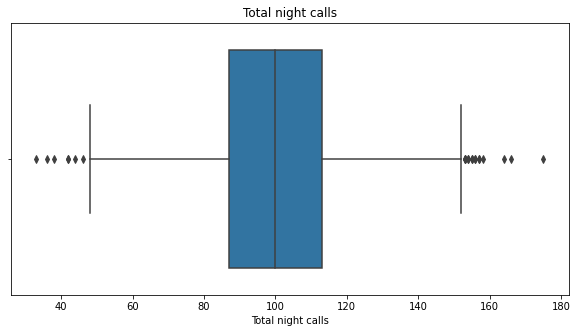

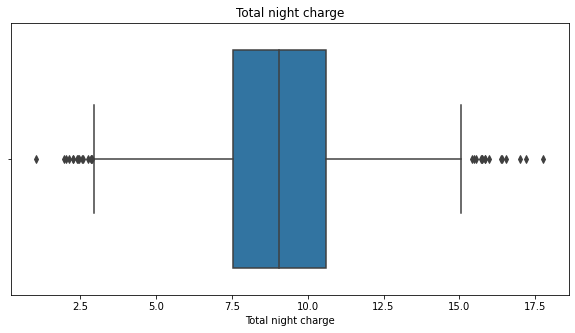

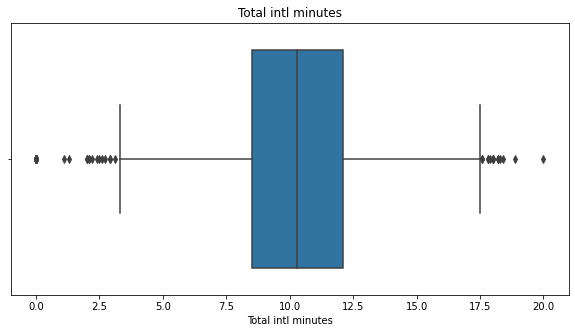

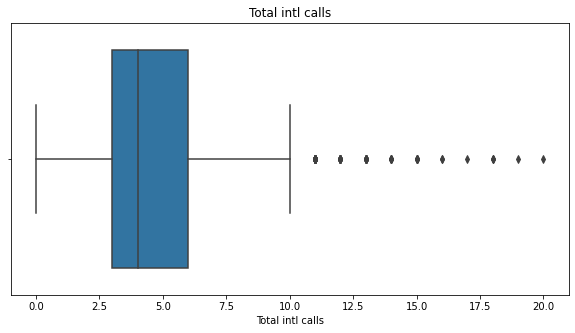

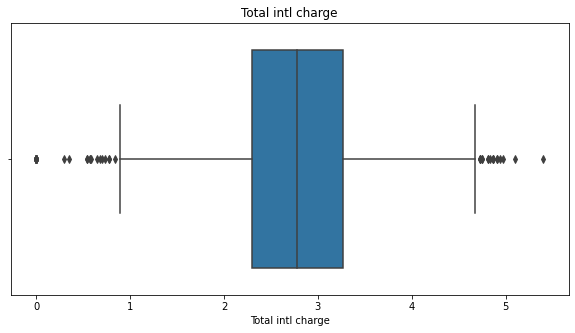

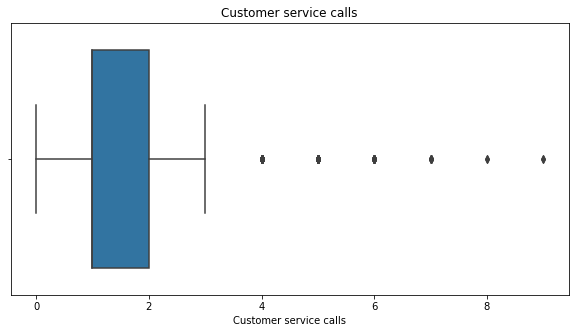

In [ ]:
for i in colname_list_num:
  plt.figure(figsize=(10,5))
  sns.boxplot(telecom_data[i])
  plt.title(i)


In [ ]:
#calculating min and max for outlier treatment
for i in colname_list_num:
  quater1=np.percentile(telecom_data[i],25)
  quater4=np.percentile(telecom_data[i],75)
  iqr=quater4-quater1
  lower_bound=quater1-(iqr*1.5)
  upper_bound=quater4+(iqr*1.5)
  #Changing outliers with mean
  telecom_data.loc[telecom_data.loc[:,i]<lower_bound,i]=telecom_data[i].mean()
  telecom_data.loc[telecom_data.loc[:,i]>upper_bound,i]=telecom_data[i].mean()

In [ ]:
#changing data type of customer service calls
telecom_data['Customer service calls']=telecom_data['Customer service calls'].astype('int64')
telecom_data['Total day calls']=telecom_data['Total day calls'].astype('int64')
telecom_data['Total eve calls']=telecom_data['Total eve calls'].astype('int64')
telecom_data['Total night calls']=telecom_data['Total night calls'].astype('int64')
telecom_data['Total intl calls']=telecom_data['Total intl calls'].astype('int64')
telecom_data['Total day calls'].dtype

dtype('int64')

Visualizing Data

In [ ]:
#creating a correlation matrix to understand the relation between final column ("Churn") with all other column in dataset
correlation_df=telecom_data.corr()
correlation_df

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.018295,0.000283,0.003867,0.035580,0.003863,-0.007371,0.023654,-0.007358,-0.012654,-0.007227,-0.012659,0.027950,0.031173,0.027608,-0.011943,0.011068
Area code,-0.018295,1.000000,-0.001504,-0.011620,-0.009037,-0.011621,-0.000193,-0.011761,-0.000166,-0.006391,0.008882,-0.006412,-0.018754,-0.009719,-0.019510,0.034992,0.006174
Number vmail messages,0.000283,-0.001504,1.000000,0.006812,-0.009499,0.006811,0.012035,-0.009558,0.012052,0.003515,0.010093,0.003499,-0.000809,-0.000926,-0.000157,-0.022671,-0.089473
Total day minutes,0.003867,-0.011620,0.006812,1.000000,0.017979,1.000000,0.007943,0.015656,0.007928,-0.004673,0.016867,-0.004699,-0.013720,-0.007221,-0.012235,-0.001134,0.186070
Total day calls,0.035580,-0.009037,-0.009499,0.017979,1.000000,0.017982,-0.023554,0.022928,-0.023551,0.025155,-0.013425,0.025145,0.013904,-0.007792,0.014158,-0.030592,0.024985
Total day charge,0.003863,-0.011621,0.006811,1.000000,0.017982,1.000000,0.007949,0.015657,0.007934,-0.004673,0.016868,-0.004699,-0.013721,-0.007221,-0.012235,-0.001141,0.186069
Total eve minutes,-0.007371,-0.000193,0.012035,0.007943,-0.023554,0.007949,1.000000,-0.022573,1.000000,-0.018990,0.001016,-0.019016,-0.017555,0.019465,-0.018240,-0.024946,0.081391
Total eve calls,0.023654,-0.011761,-0.009558,0.015656,0.022928,0.015657,-0.022573,1.000000,-0.022571,0.009006,0.002540,0.009045,0.003467,0.006936,0.002879,-0.015070,0.002870
Total eve charge,-0.007358,-0.000166,0.012052,0.007928,-0.023551,0.007934,1.000000,-0.022571,1.000000,-0.018998,0.001024,-0.019024,-0.017562,0.019469,-0.018246,-0.024946,0.081382
Total night minutes,-0.012654,-0.006391,0.003515,-0.004673,0.025155,-0.004673,-0.018990,0.009006,-0.018998,1.000000,0.004791,0.999999,-0.008811,0.017134,-0.006785,-0.003558,0.037448


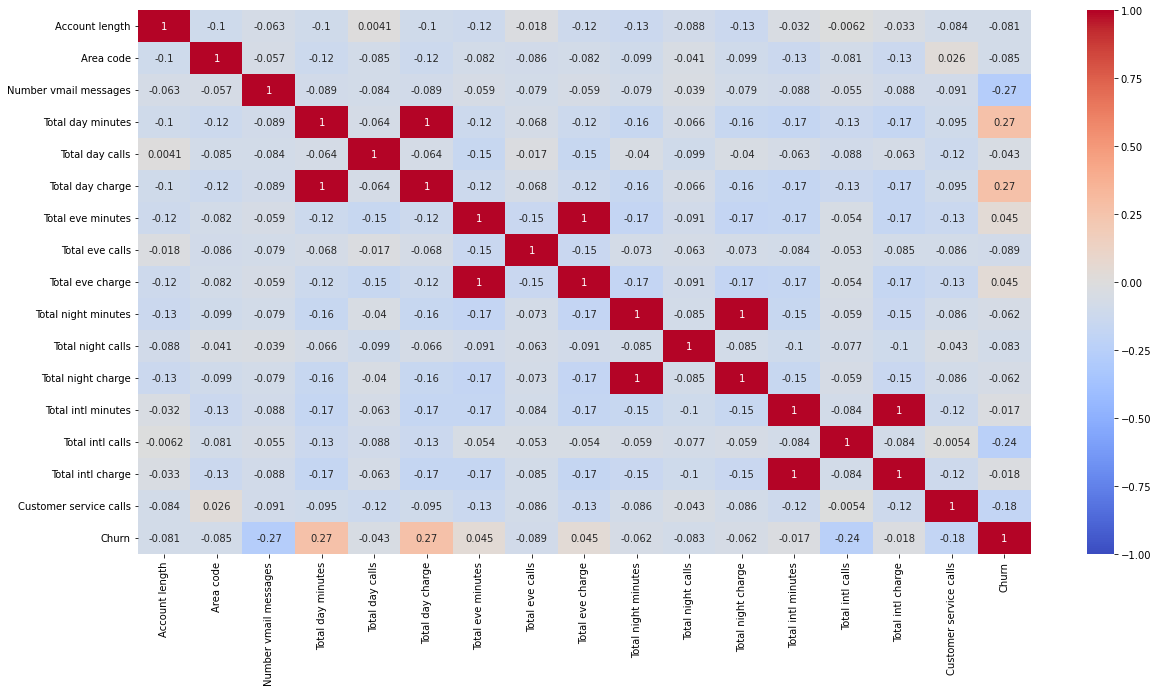

In [ ]:
#Plotting the above correlatiion dataframe in a heat map
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_df.corr(), vmin=-1, cmap='coolwarm', annot=True)

Text(0.5, 1.0, 'Distribution of churn column')

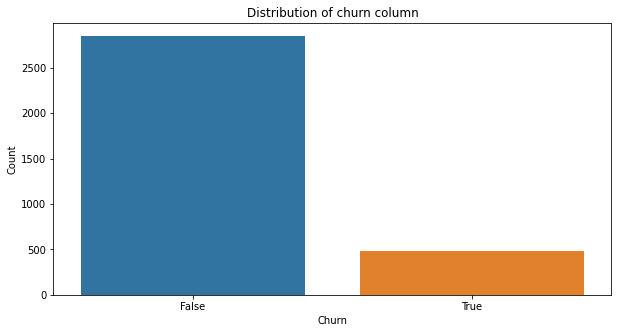

In [ ]:
#Checking the Churn column distribution over given data set
plt.figure(figsize=(10,5))
sns.countplot(x=telecom_data.Churn)
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Distribution of churn column")
#We can see that the data is not properly distributed we have more number of "False" than "True" in our dataset

We can see that the data is not properly distributed we have more number of "False" than "True" in our dataset

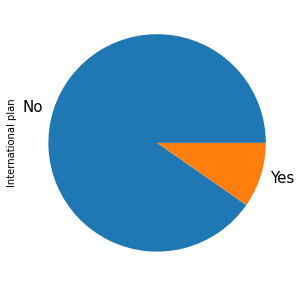

In [ ]:
telecom_data['International plan'].value_counts().plot(kind='pie',figsize=(10,5),fontsize=15)
#telecom_data['International plan'].value_counts()
#3010 for No and 323 for yes i.e 90% no and 10% yes

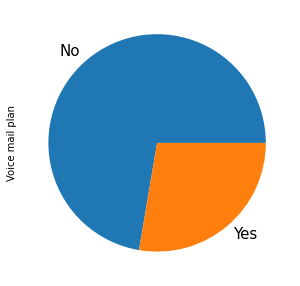

In [ ]:
telecom_data['Voice mail plan'].value_counts().plot(kind='pie',figsize=(10,5),fontsize=15)
#telecom_data['Voice mail plan'].value_counts()
#2411 for no and 922 for yes i.e 72% no and 28% yes

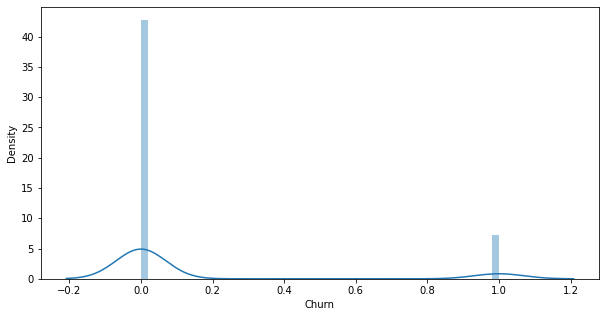

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(telecom_data["Churn"],hist=True)

In [ ]:
telecom_data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
#Caluclating Churn rate (Lost customer/Total Chustomer *100)
churn_rate=len(telecom_data[telecom_data['Churn']==True])/len(telecom_data['Churn'])
print(f"Churn rate for given data set is {round(churn_rate*100,2)}%")

Churn rate for given data set is 14.49%


In [ ]:
#telecom_data.groupby(["State","Churn"])["Churn"].count().unstack().plot(kind='bar')

#Creating function to plot graph with target variabel
def bar_plot(x,y):
  telecom_data.groupby([x,y])[y].count().unstack().plot(kind='bar',figsize=(20,8))
  plt.xlabel(x,fontsize=20)
  plt.ylabel("Count",fontsize=20)
  plt.title(x+" vs "+y,fontsize=40)


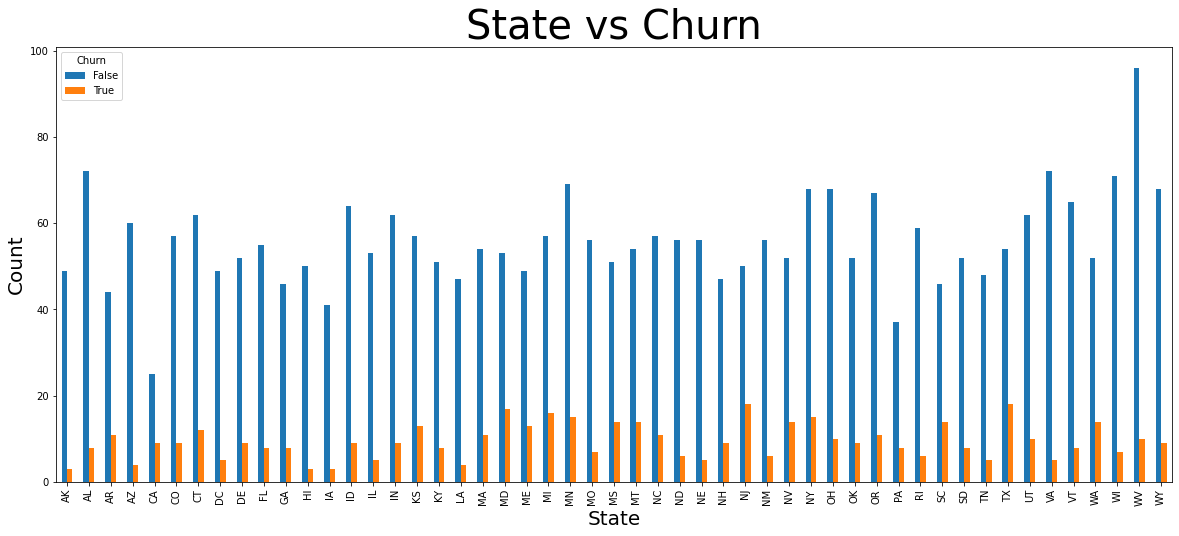

In [ ]:
#State Vs Churn
bar_plot('State','Churn')

In [ ]:
retained_cust=telecom_data.groupby(["State","Churn"])["Churn"].count().unstack().sort_values(False)
notretained_cust=telecom_data.groupby(["State","Churn"])["Churn"].count().unstack().sort_values(True)
print(f"State that has highest number of customer not canceled the subscription is :{retained_cust.iloc[-1,:].name}")
print(f"State that has highest number of customer canceled the subscription is :{notretained_cust.iloc[-1,:].name}")

State that has highest number of customer not canceled the subscription is :WV
State that has highest number of customer canceled the subscription is :TX


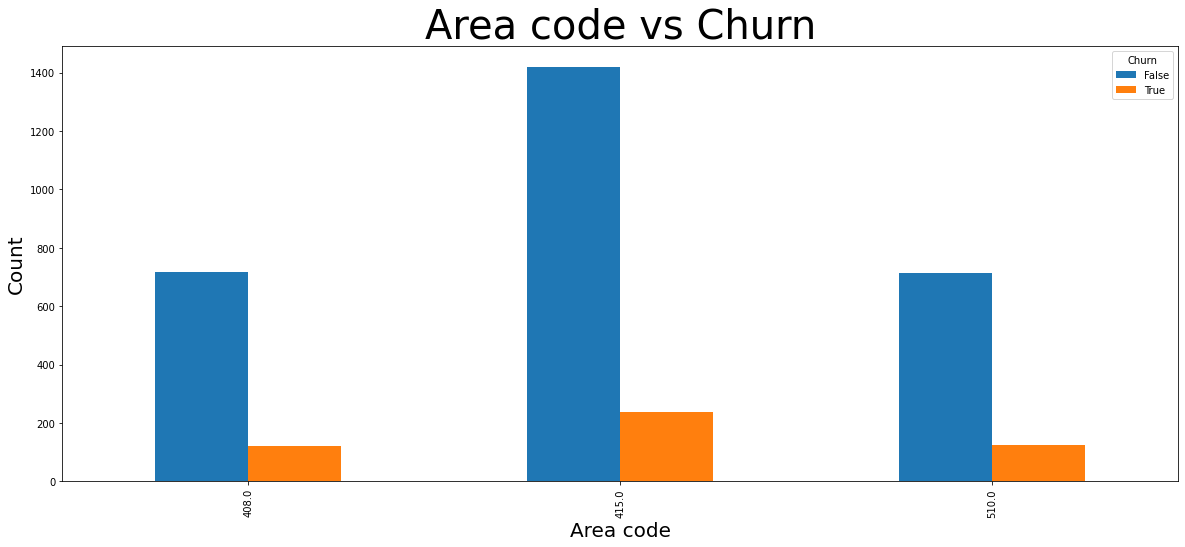

In [ ]:
bar_plot('Area code','Churn')

###Area code 415 has the higest numbers of customer

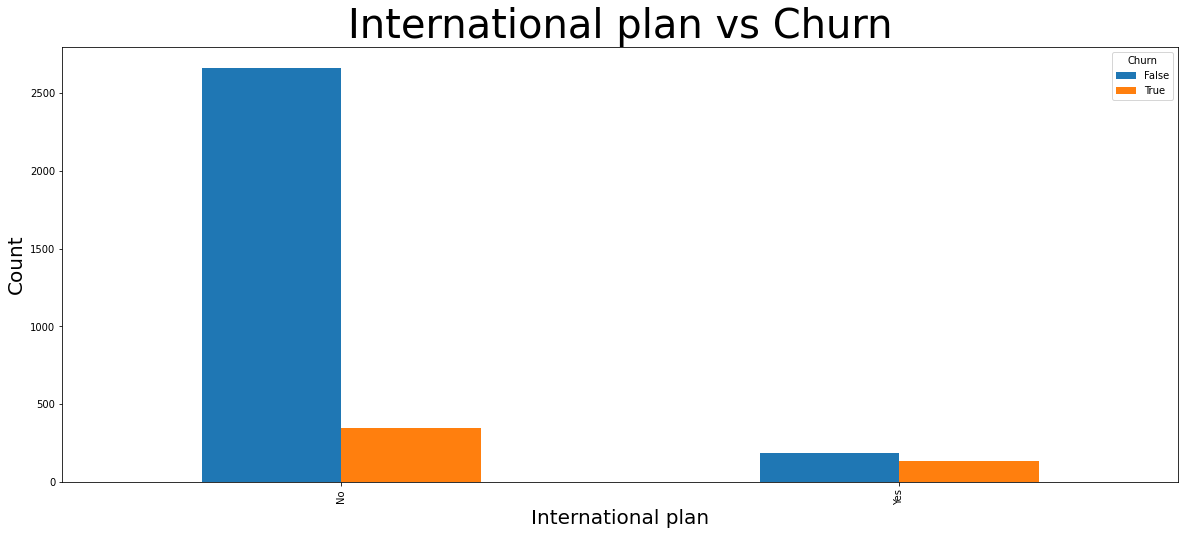

In [ ]:
bar_plot('International plan','Churn')

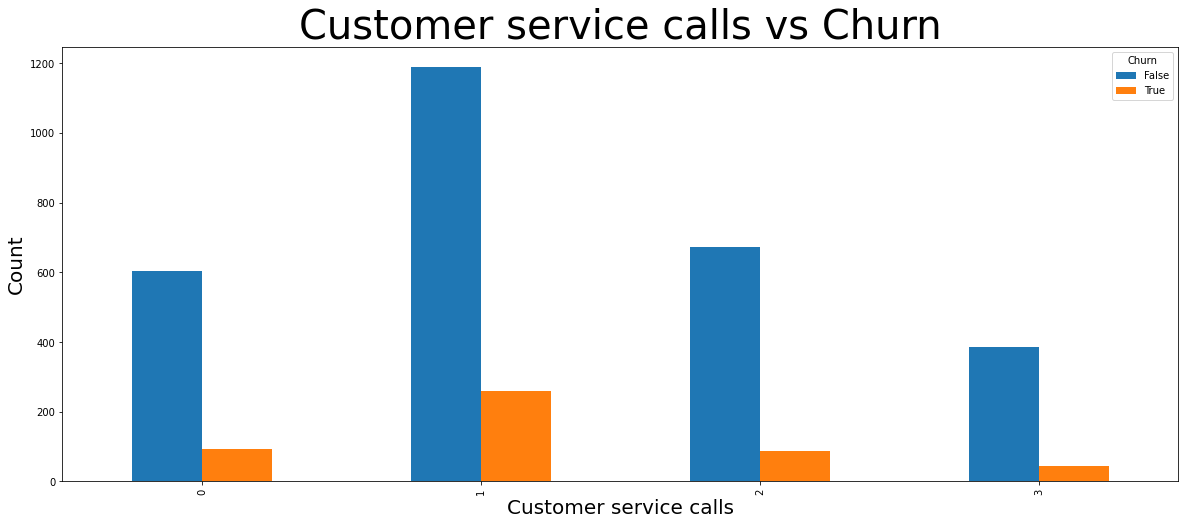

In [ ]:
bar_plot('Customer service calls','Churn')

In [ ]:
telecom_data['Customer service calls'].value_counts()

1    1448
2     759
0     697
3     429
Name: Customer service calls, dtype: int64

### If customer is calling for first time for service it has high change of customer will cancele the subscription or not based on the service given to customer

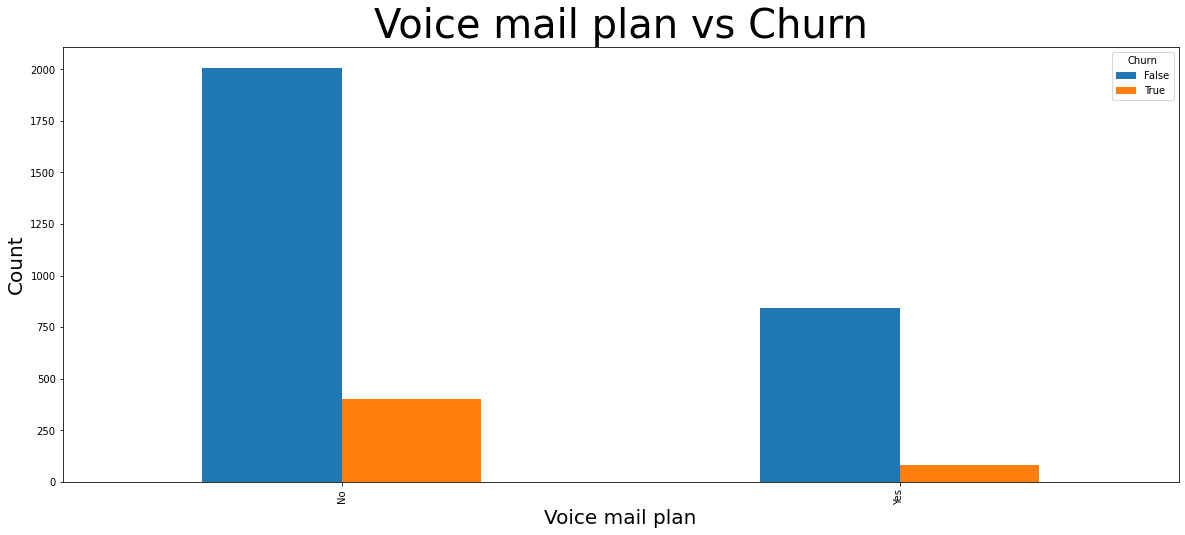

In [ ]:
bar_plot('Voice mail plan','Churn')

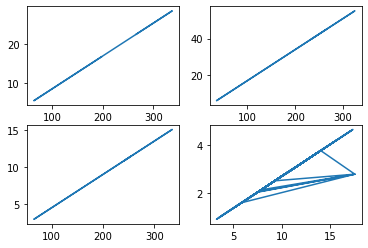

In [ ]:
#line graph
figure, axis=plt.subplots(2,2)
axis[0,0].plot(telecom_data['Total eve minutes'],telecom_data['Total eve charge'])
axis[0,1].plot(telecom_data['Total day minutes'],telecom_data['Total day charge'])
axis[1,0].plot(telecom_data['Total night minutes'],telecom_data['Total night charge'])
axis[1,1].plot(telecom_data['Total intl minutes'],telecom_data['Total intl charge'])


Text(0.5, 1.0, 'State vs Customer service call')

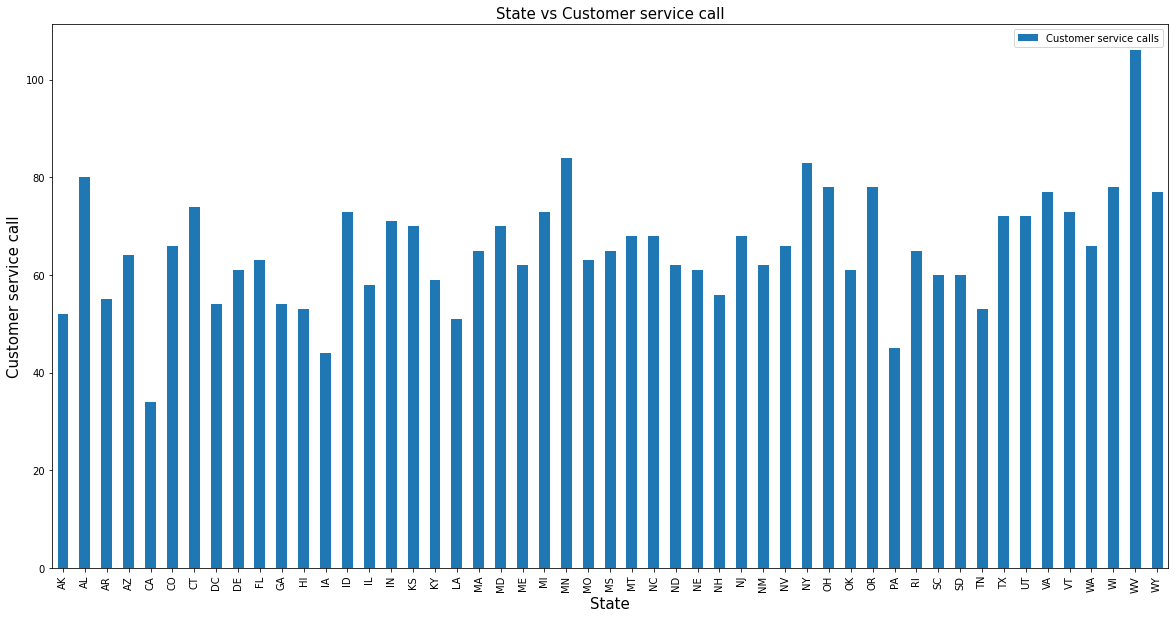

In [ ]:
telecom_data.groupby(['State']).agg({'Customer service calls':'count'}).plot(kind='bar', figsize=(20,10))
plt.xlabel("State",fontsize=15)
plt.ylabel("Customer service call",fontsize=15)
plt.title("State vs Customer service call", fontsize=15)
#Max customer service call by state WV and min by state CA

Text(0.5, 1.0, 'Area code vs Customer service call')

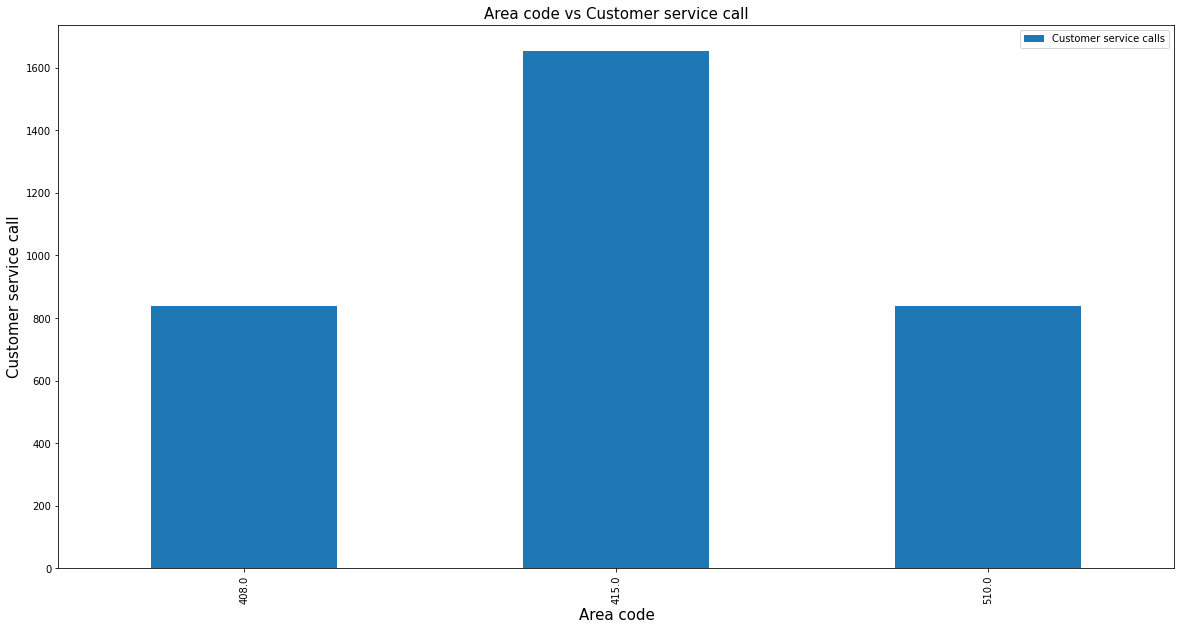

In [ ]:
telecom_data.groupby(['Area code']).agg({'Customer service calls':'count'}).plot(kind='bar', figsize=(20,10))
plt.xlabel("Area code",fontsize=15)
plt.ylabel("Customer service call",fontsize=15)
plt.title("Area code vs Customer service call", fontsize=15)
#Max customer service call by state 415 

### Bi Variant and Multi variant analysis

In [ ]:
#telecom_data.groupby(['Total night calls']).agg({'Total night charge':'mean','Churn':'count'})
# Creating function for Bi Variant analysis
def biv_plot(x,y):
  telecom_data.groupby([x]).agg({y:'mean','Churn':'count'}).plot(figsize=(10,5))
  plt.title(x+" " +y+" "+" Churn")
  plt.show()

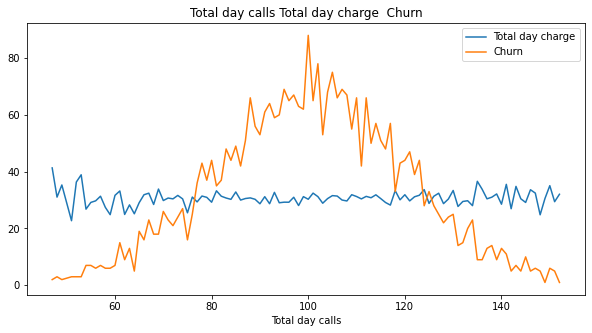

In [ ]:
biv_plot('Total day calls','Total day charge')

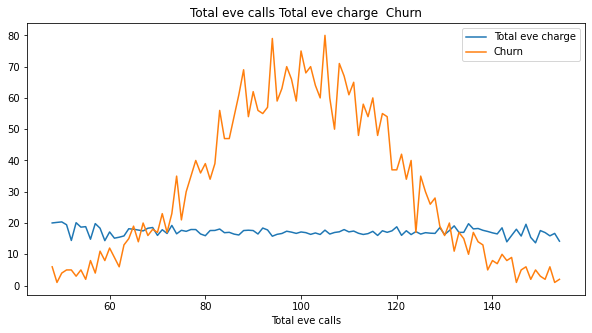

In [ ]:
biv_plot('Total eve calls','Total eve charge')

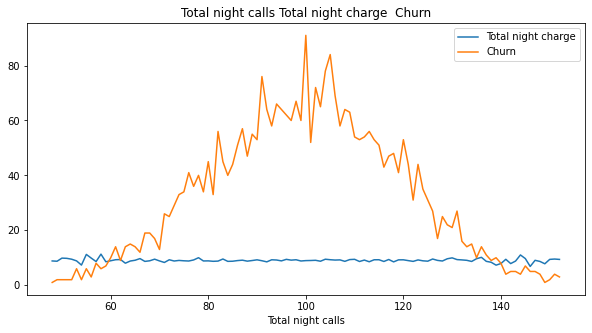

In [ ]:
biv_plot('Total night calls','Total night charge')

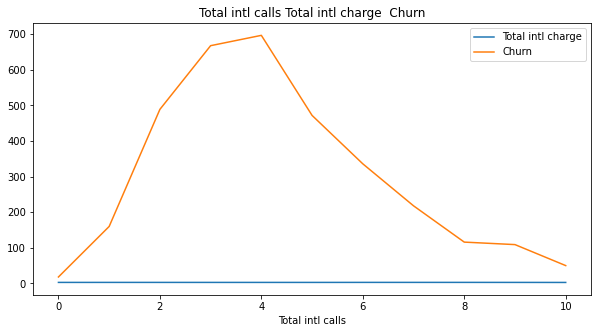

In [ ]:
biv_plot('Total intl calls','Total intl charge')

In [ ]:
#telecom_data.groupby(['State','Churn']).agg({'Total day charge':'mean'}).unstack()

#Grouping by either state or area code  and mean of charge and count of churn True and False
def multi_var(x,y):
  telecom_data.groupby([x,'Churn']).agg({y:'mean'}).unstack().plot(figsize=(20,10),kind='bar') 
  plt.ylabel("Mean of "+y,fontsize=20)
  plt.xlabel(x,fontsize=20)
  plt.show()

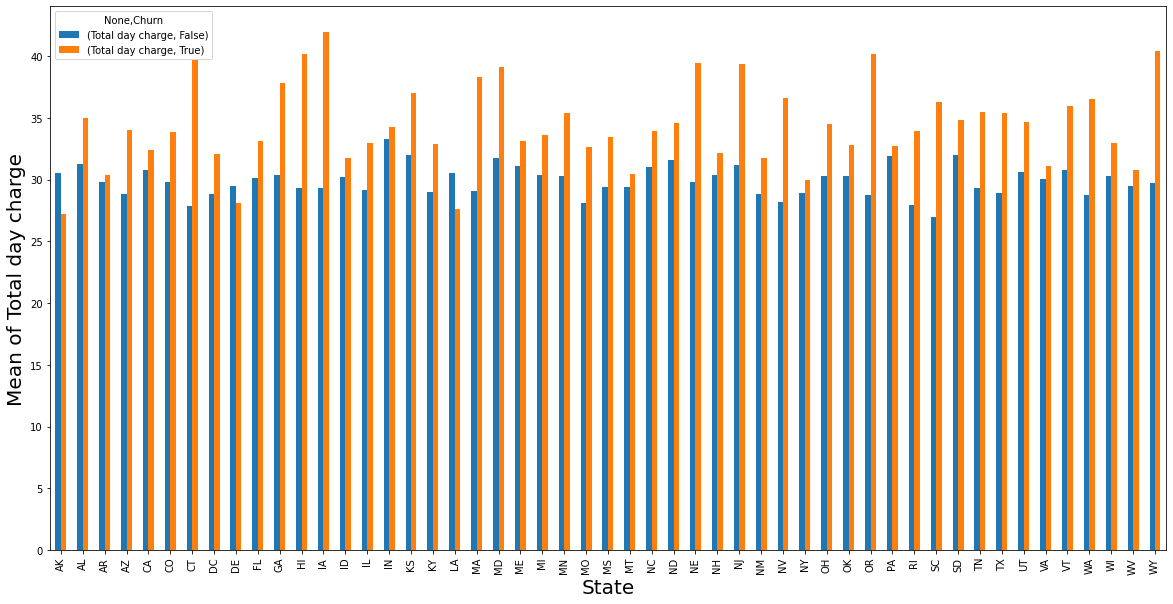

In [ ]:
multi_var('State','Total day charge')

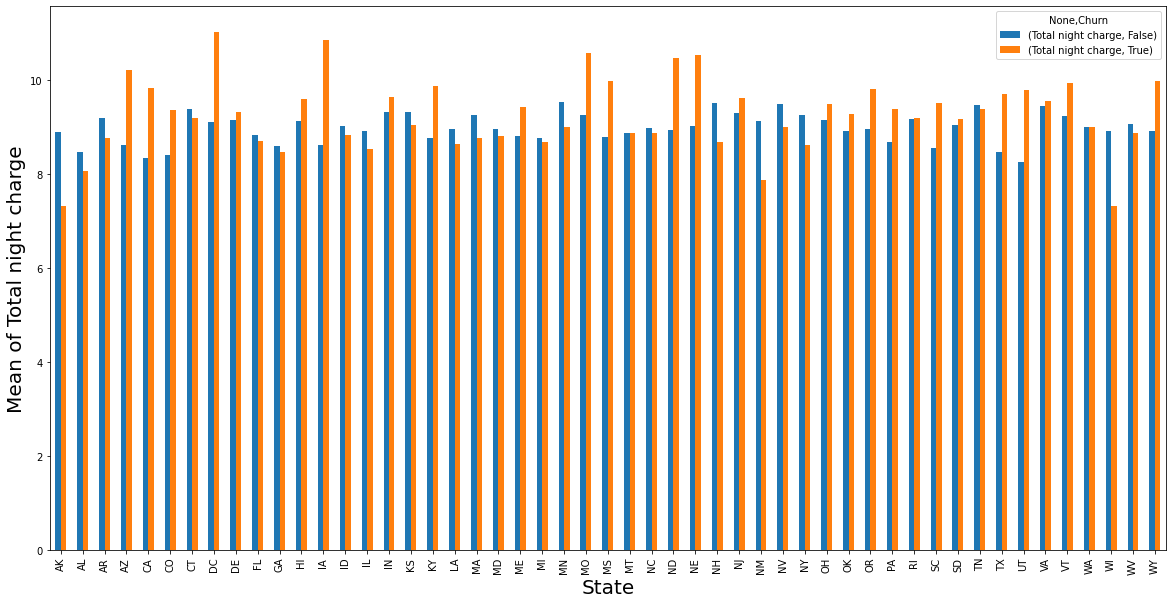

In [ ]:
multi_var('State','Total night charge')

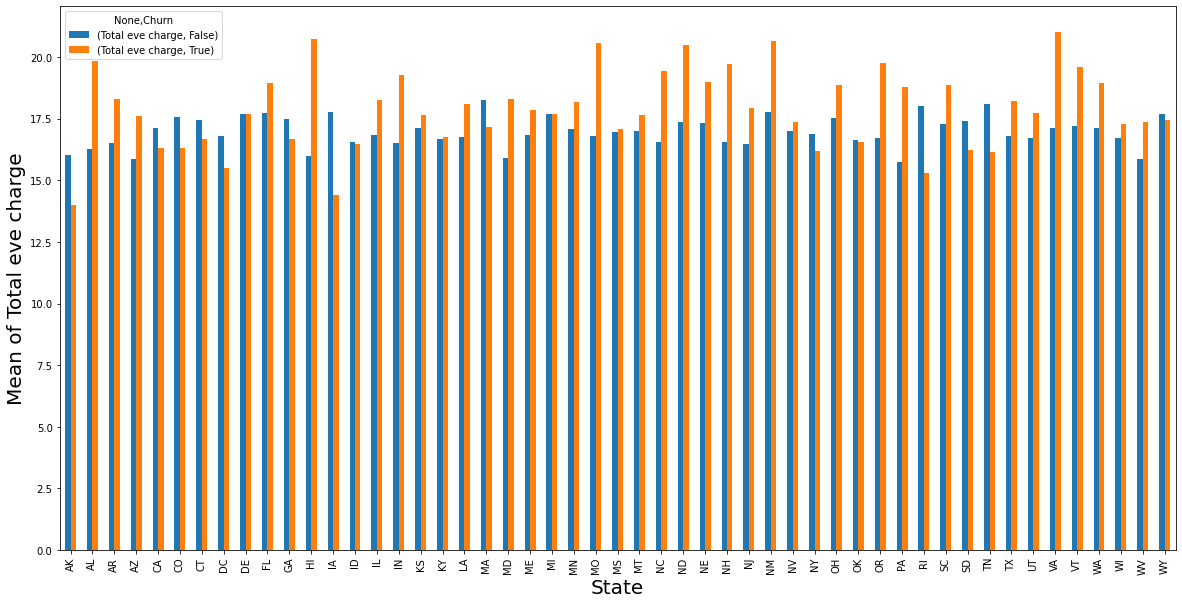

In [ ]:
multi_var('State','Total eve charge')

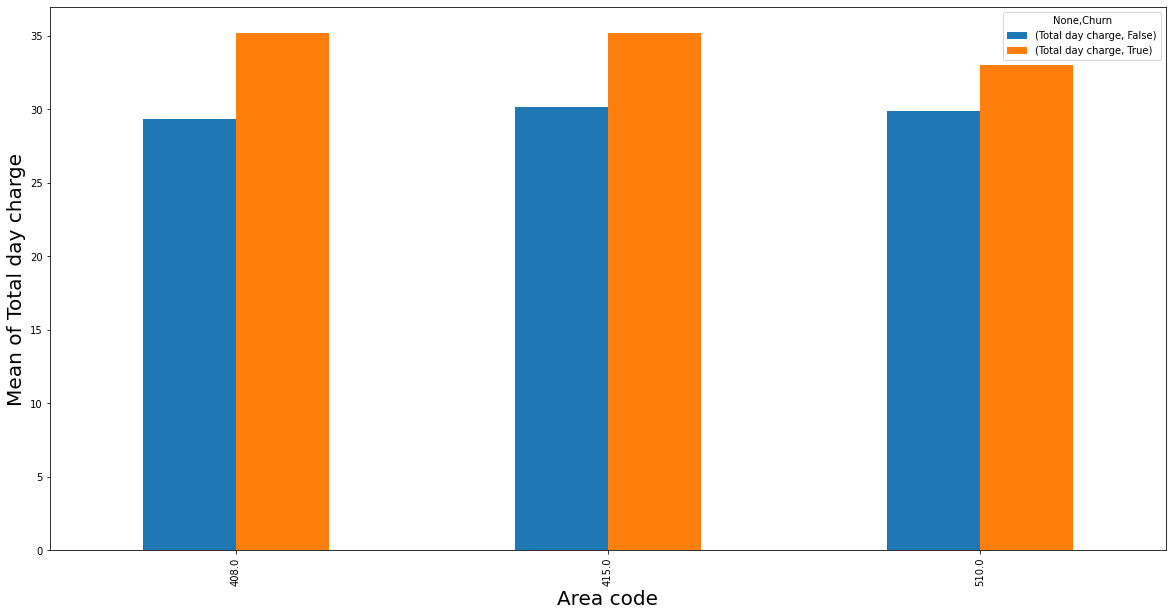

In [ ]:
multi_var('Area code','Total day charge')

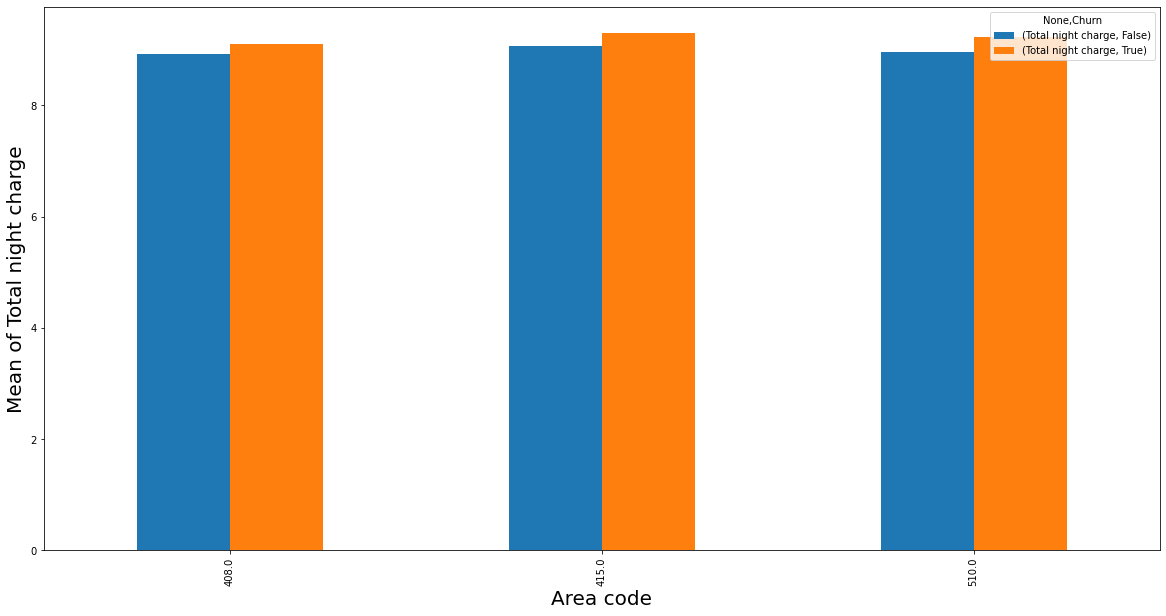

In [ ]:
multi_var('Area code','Total night charge')

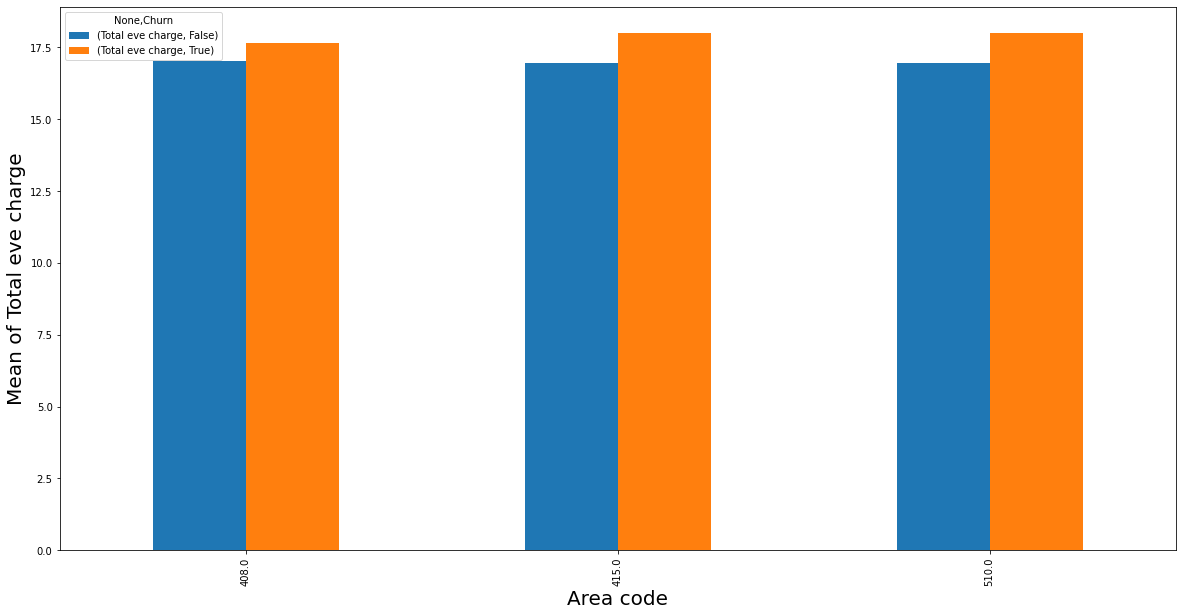

In [ ]:
multi_var('Area code','Total eve charge')

In [ ]:
#Creating new column by adding all the day, eve and night charges and calls
telecom_data['Total charge']=telecom_data['Total day charge']+telecom_data['Total eve charge']+telecom_data['Total night charge']
telecom_data['Total calls']=telecom_data['Total day calls']+telecom_data['Total eve calls']+telecom_data['Total night calls']

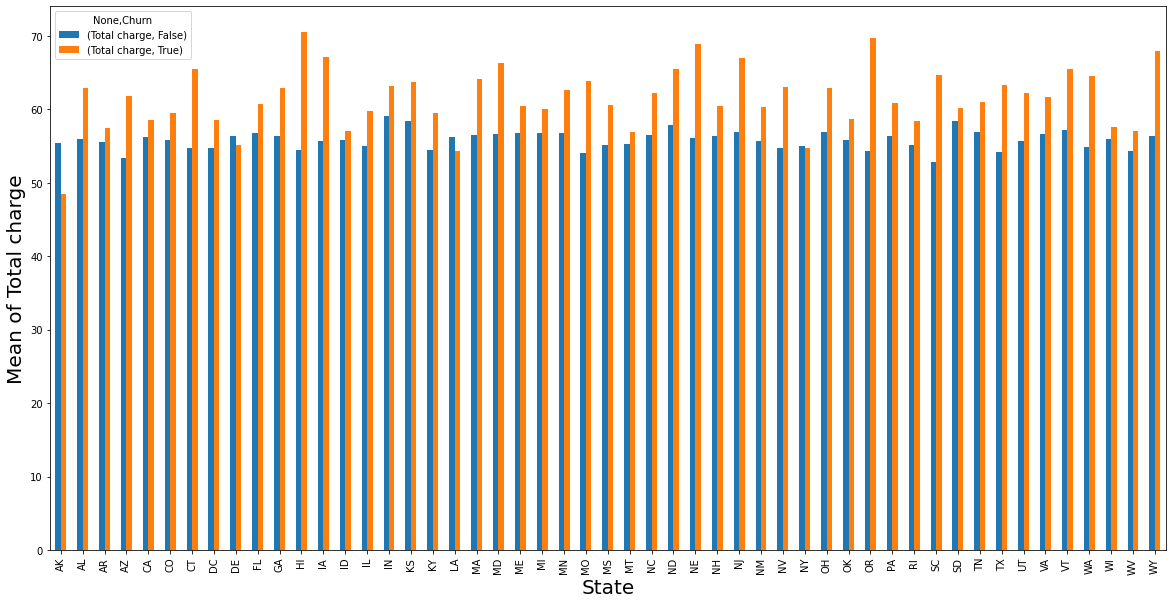

In [ ]:
multi_var('State','Total charge')

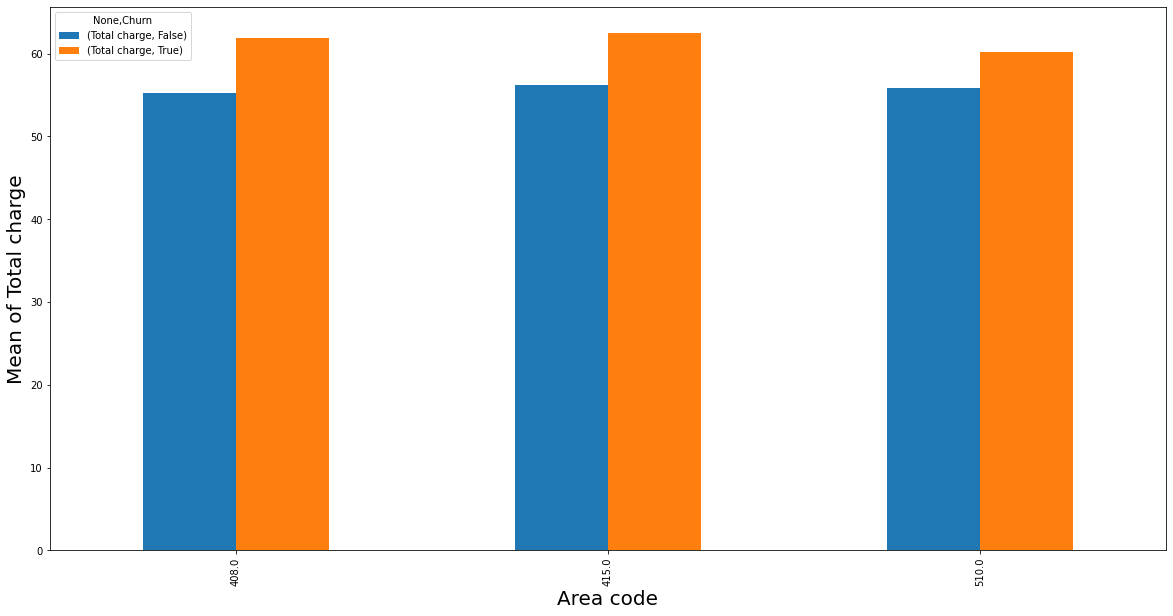

In [ ]:
multi_var('Area code','Total charge')

###We can see that increase in charge is resulting in cancellation of subscription. So for customer retention we can introduce new plans which are not highly priced

In [ ]:
find_max_charge=telecom_data.groupby(['State','Churn']).agg({'Total charge':'mean'}).unstack().sort_values(by=('Total charge',True))
find_max_charge1=telecom_data.groupby(['State','Churn']).agg({'Total charge':'mean'}).unstack().sort_values(by=('Total charge',False))
print(f'State with higest average total charge for costumer cancelling the subscription is {find_max_charge.iloc[-1,:].name} with charge of {find_max_charge.iloc[-1,1]}')
print(f'State with higest average total charge for costumer not cancelling the subscription is {find_max_charge1.iloc[-1,:].name} with charge of {find_max_charge1.iloc[-1,1]}')
#find_max_charge.iloc[-1,1]

State with higest average total charge for costumer cancelling the subscription is HI with charge of 70.47666666666667
State with higest average total charge for costumer not cancelling the subscription is IN with charge of 63.168700855584106


In [ ]:
x=find_max_charge.iloc[-3:,1].index
print(f'Top 3 states with higest average charge and cancelling the subscribtion are{x[2], x[1], x[0]}')

Top 3 states with higest average charge and cancelling the subscribtion are('HI', 'OR', 'NE')


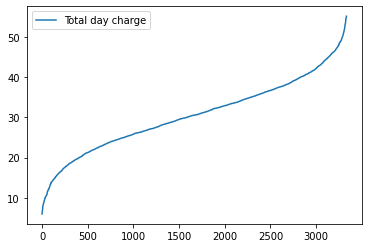

In [ ]:
#Showing the total day charge column
telecom_data['Total day charge'].sort_values().reset_index().drop('index',axis=1).plot()
